<a href="https://colab.research.google.com/github/amartsin/Midas-Assignment/blob/main/2nd%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import random
import shutil

import os
import numpy as np

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [18]:
from zipfile import ZipFile
file_name = "trainPart1.zip"

with ZipFile(file_name , 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [19]:
from shutil import copyfile

In [20]:
#SPLITTING FUNCTION FOR TRAIN TEST SPLIT OF THE DATASET

def img_train_test_split(img_source_dir, train_size):
    """
    Randomly splits images over a train and validation folder, while preserving the folder structure
    
    Parameters
    ----------
    img_source_dir : string
        Path to the folder with the images to be split. Can be absolute or relative path   
        
    train_size : float
        Proportion of the original images that need to be copied in the subdirectory in the train folder
    """    
    if not (isinstance(img_source_dir, str)):
        raise AttributeError('img_source_dir must be a string')
        
    if not os.path.exists(img_source_dir):
        raise OSError('img_source_dir does not exist')
        
    if not (isinstance(train_size, float)):
        raise AttributeError('train_size must be a float')
        
    # Set up empty folder structure if not exists
    if not os.path.exists('data'):
        os.makedirs('data')
    else:
        if not os.path.exists('data/train'):
            os.makedirs('data/train')
        if not os.path.exists('data/validation'):
            os.makedirs('data/validation')
            
    # Get the subdirectories in the main image folder
    subdirs = [subdir for subdir in os.listdir(img_source_dir) if os.path.isdir(os.path.join(img_source_dir, subdir))]

    for subdir in subdirs:
        subdir_fullpath = os.path.join(img_source_dir, subdir)
        if len(os.listdir(subdir_fullpath)) == 0:
            print(subdir_fullpath + ' is empty')
            break

        train_subdir = os.path.join('data/train', subdir)
        validation_subdir = os.path.join('data/validation', subdir)

        # Create subdirectories in train and validation folders
        if not os.path.exists(train_subdir):
            os.makedirs(train_subdir)

        if not os.path.exists(validation_subdir):
            os.makedirs(validation_subdir)

        train_counter = 0
        validation_counter = 0

        # Randomly assign an image to train or validation folder
        for filename in os.listdir(subdir_fullpath):
            if filename.endswith(".jpg") or filename.endswith(".png"): 
                fileparts = filename.split('.')

                if random.uniform(0, 1) <= train_size:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(train_subdir, str(train_counter) + '.' + fileparts[1]))
                    train_counter += 1
                else:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(validation_subdir, str(validation_counter) + '.' + fileparts[1]))
                    validation_counter += 1
                    
        print('Copied ' + str(train_counter) + ' images to data/train/' + subdir)
        print('Copied ' + str(validation_counter) + ' images to data/validation/' + subdir)

In [21]:
img_train_test_split('/content/train/',0.85 )

Copied 32 images to data/train/Sample062
Copied 8 images to data/validation/Sample062
Copied 35 images to data/train/Sample054
Copied 5 images to data/validation/Sample054
Copied 34 images to data/train/Sample002
Copied 6 images to data/validation/Sample002
Copied 30 images to data/train/Sample015
Copied 10 images to data/validation/Sample015
Copied 34 images to data/train/Sample030
Copied 6 images to data/validation/Sample030
Copied 31 images to data/train/Sample055
Copied 9 images to data/validation/Sample055
Copied 32 images to data/train/Sample008
Copied 8 images to data/validation/Sample008
Copied 36 images to data/train/Sample046
Copied 4 images to data/validation/Sample046
Copied 35 images to data/train/Sample041
Copied 5 images to data/validation/Sample041
Copied 33 images to data/train/Sample042
Copied 7 images to data/validation/Sample042
Copied 37 images to data/train/Sample035
Copied 3 images to data/validation/Sample035
Copied 35 images to data/train/Sample021
Copied 5 ima

In [22]:


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
training_set = train_datagen.flow_from_directory('/content/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',color_mode='grayscale')

Found 2181 images belonging to 62 classes.


In [24]:

test_set = test_datagen.flow_from_directory('/content/data/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',color_mode='grayscale')


Found 488 images belonging to 62 classes.


In [25]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= (224,224,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(62))#output
model.add(Activation("softmax"))

In [26]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])
batch_size=32

In [27]:
hist = model.fit_generator(generator = training_set, 
                   
                   epochs = 50,
                   validation_data = test_set,
                   
                   verbose=1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
69/69 [==============================] - 42s 580ms/step - loss: 4.1412 - accuracy: 0.0157 - val_loss: 4.1258 - val_accuracy: 0.0287
Epoch 2/50
69/69 [==============================] - 40s 583ms/step - loss: 4.0904 - accuracy: 0.0249 - val_loss: 3.5517 - val_accuracy: 0.1045
Epoch 3/50
69/69 [==============================] - 40s 588ms/step - loss: 3.5866 - accuracy: 0.0989 - val_loss: 2.9972 - val_accuracy: 0.1824
Epoch 4/50
69/69 [==============================] - 40s 581ms/step - loss: 2.9502 - accuracy: 0.2260 - val_loss: 2.4396 - val_accuracy: 0.3586
Epoch 5/50
69/69 [==============================] - 40s 581ms/step - loss: 2.3804 - accuracy: 0.3274 - val_loss: 1.5903 - val_accuracy: 0.5574
Epoch 6/50
69/69 [==============================] - 40s 580ms/step - loss: 1.8645 - accuracy: 0.4542 - val_loss: 1.3236 - val_accuracy: 0.6373
Epoch 7/50
69/69 [==============================] - 40s 581ms/step - loss: 1.3377 - accuracy: 0.6017 - val_loss: 1.0784 - val_accuracy: 0.7070

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

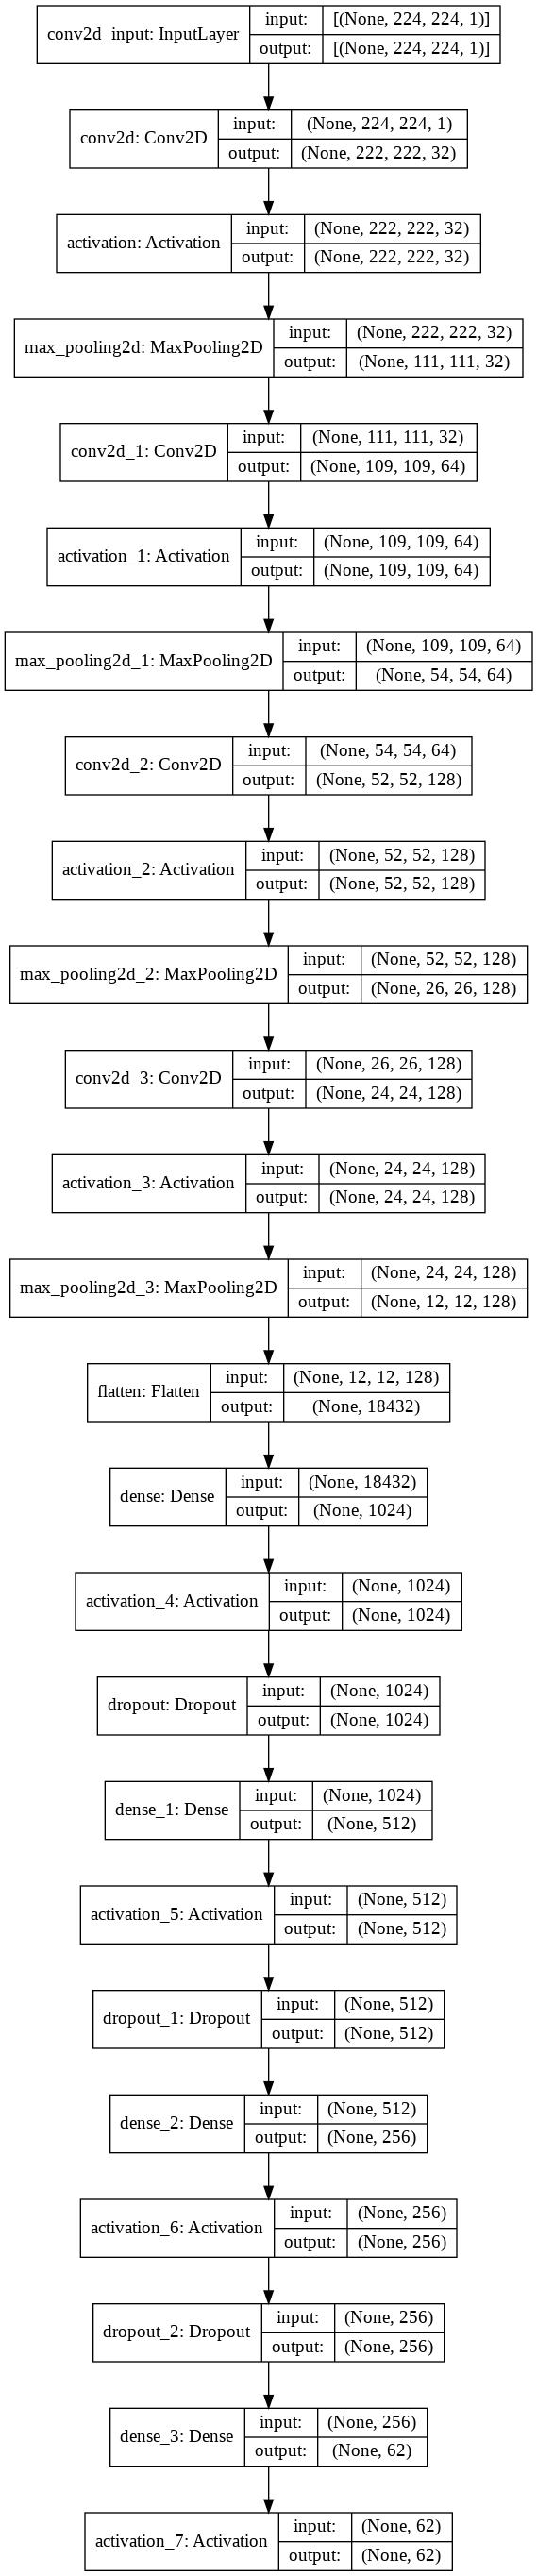

In [41]:

tf.keras.utils.plot_model(model, to_file='model.jpg', show_shapes=True)

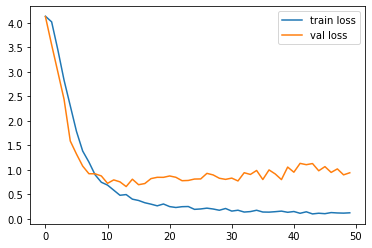

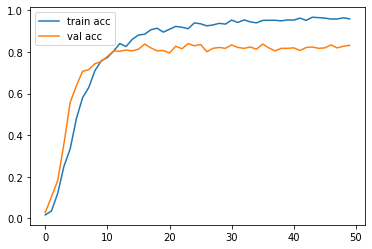

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [30]:
x_train = x_train.reshape(60000, 784,1,1).astype("float32") / 255
x_test = x_test.reshape(10000, 196,4,1).astype("float32") / 255

In [31]:
model.save('model.h5')

In [32]:
loaded_model = tf.keras.models.load_model('dog_cat_model.h5')


In [33]:
loaded_model.pop()

In [34]:
loaded_model.pop()

In [35]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [36]:
loaded_model.add(Dense(10))#output
loaded_model.add(Activation("softmax"))